In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# Import data

This is heart data from the UMass Statistical Data website (http://www.umass.edu/statdata/index.html)

In [3]:
dataset = np.genfromtxt('heart.csv', delimiter=",")

x = dataset[:,1:]
x = np.insert(x,0,1,axis=1)  # Add 1's for bias

print x.shape

y = dataset[:,0]
y = np.reshape(y, (y.shape[0],1))  # Reshape to a column vector

print y.shape

(200L, 17L)
(200L, 1L)


# Notes

In the 1 predictor case...

The cost function for linear regression is
1/2m(sum((theta0 + theta1(x) - y) ^ 2))

Partial derivative wrt theta0: 1/m(sum(theta0 + theta1 - y))

Partial derivative wrt theta1: 1/m(sum(theta0 + theta1 - y)) * x

Parameter update: theta = theta - alpha(partial derivative)

# Evaluate hypothesis

All vectors are treated as column vectors. Here, X is a 200x18 feature matrix, and the weights are set as 18x1 column vector

Value of the hypothesis is just the dot product of X and the weights vector.

In [4]:
def h(weights, X):
    """ Calculate the hypothesis value.
    
    Parameters:
    weights -- a nx1 column vector, where n is the number of features/variables plus 1 for the bias/intercept
    X -- a mxn matrix, where m is the number of training examples, plus a column of 1's for the bias
    
    Return:
    An mx1 column vector containing the hypothesis values for each training example
    """

    return np.dot(X, weights)

# Test that we correctly evaluate the hypothesis value for each training example
theta = np.ones((x.shape[1],1))
print h(theta, x)

[[ 1379.]
 [ 1409.]
 [ 1676.]
 [ 1451.]
 [ 1297.]
 [ 1276.]
 [ 1422.]
 [ 1546.]
 [ 1638.]
 [ 1256.]
 [ 1454.]
 [ 1353.]
 [ 1283.]
 [ 1423.]
 [ 1426.]
 [ 1574.]
 [ 1441.]
 [ 1534.]
 [ 1448.]
 [ 1524.]
 [ 1417.]
 [ 1632.]
 [ 1610.]
 [ 1262.]
 [ 1468.]
 [ 1376.]
 [ 1428.]
 [ 1322.]
 [ 1506.]
 [ 1518.]
 [ 1360.]
 [ 1303.]
 [ 1219.]
 [ 1482.]
 [ 1481.]
 [ 1289.]
 [ 1477.]
 [ 1405.]
 [ 1593.]
 [ 1336.]
 [ 1495.]
 [ 1285.]
 [ 1415.]
 [ 1683.]
 [ 1330.]
 [ 1430.]
 [ 1232.]
 [ 1292.]
 [ 1534.]
 [ 1413.]
 [ 1495.]
 [ 1199.]
 [ 1514.]
 [ 1517.]
 [ 1408.]
 [ 1492.]
 [ 1257.]
 [ 1357.]
 [ 1384.]
 [ 1659.]
 [ 1445.]
 [ 1296.]
 [ 1428.]
 [ 1316.]
 [ 1599.]
 [ 1573.]
 [ 1468.]
 [ 1552.]
 [ 1404.]
 [ 1368.]
 [ 1396.]
 [ 1460.]
 [ 1242.]
 [ 1435.]
 [ 1325.]
 [ 1439.]
 [ 1707.]
 [ 1371.]
 [ 1560.]
 [ 1326.]
 [ 1720.]
 [ 1274.]
 [ 1319.]
 [ 1517.]
 [ 1324.]
 [ 1333.]
 [ 1369.]
 [ 1430.]
 [ 1418.]
 [ 1508.]
 [ 1189.]
 [ 1356.]
 [ 1475.]
 [ 1329.]
 [ 1484.]
 [ 1345.]
 [ 1264.]
 [ 1228.]
 [ 1452.]
 [ 1296.]


# Calculate cost

For each training example we calculate the total residual value using all available predictors.

Then we square each residual/error value (and sum across all training examples) with the dot product. The average squared error is then returned as the cost/loss value

In [64]:
def calculate_cost(weights, X, Y):
    """Calculate total cost across all samples and features for a given set of weights
    
    Parameters:
    weights -- a nx1 column vector, where n is the number of features/variables plus 1 for the bias/intercept
    X -- a mxn matrix, where m is the number of training examples, plus a column of 1's for the bias
    Y -- a mx1 column vector containing the labels/targets for each training example
    
    Returns:
    residuals -- mx1 array of residuals for each training example
    total_cost -- 1x1 float value representing the average squared error across the entire dataset for a given set of weights
    """
    m = Y.shape[0]  # Number of training examples. Equivalent to X.shape[0]
    residuals = h(weights, X) - Y  # mx1 column vector containing residual for each training example
    squared_error = np.dot(residuals.T, residuals)  # 1x1 containing the total squared error
    total_cost = float(1)/(2*m) * squared_error  # 1x1 containing average cost value over all training examples
    
    return residuals, total_cost

# Test that we return a scalar cost value, calculated across all training examples and all features for a given set of weights
print calculate_cost(theta, x, y)[1]

[[ 908907.6225]]


# Gradient Descent

Simultaneously update the weight values after calculating the partial derivative

In [70]:
def gradient_descent(weights, X, Y, iterations = 1000, alpha = 1e-6, verbose = True):
    """Update weight values using gradient descent
    
    Parameters:
    weights -- a nx1 column vector, where n is the number of features/variables plus 1 for the bias/intercept
    X -- a mxn matrix, where m is the number of training examples, plus a column of 1's for the bias
    Y -- a mx1 column vector containing the labels/targets for each training example
    iterations -- number of training iterations to perform
    alpha -- learning rate. Step size multiplier for each weight adjustment
    verbose -- print the current iteration number and current cost value
    
    Returns:
    cost_history -- numpy array containing the cost values for each iteration
    theta -- vector of final weights after all training iterations
    """
    theta = weights
    m = Y.shape[0]  # Number of training examples. Equivalent to X.shape[0]
    cost_history = np.zeros(iterations)  # Initialize array of cost history values with 0's

    for i in xrange(iterations):
        residuals, cost = calculate_cost(theta, X, Y)
        gradient = (float(1)/m) * np.dot(residuals.T, X).T  #nx1 column vector containing current gradient of each variable
        theta -= (alpha * gradient)  #nx1 column vector containing updated all updated weight values
        
        # Store the cost for this iteration
        cost_history[i] = cost
        
        if verbose:
            print "Iteration: %d | Cost: %f" % (i+1, cost)

    return cost_history, theta

# Test gradient descent over 10 iterations
initial_weights = np.ones((x.shape[1],1))
history, final_weights = gradient_descent(initial_weights, x, y, iterations = 10)            

Iteration: 1 | Cost: 908907.622500
Iteration: 2 | Cost: 518739.181445
Iteration: 3 | Cost: 296283.030309
Iteration: 4 | Cost: 169447.872578
Iteration: 5 | Cost: 97130.931931
Iteration: 6 | Cost: 55897.503979
Iteration: 7 | Cost: 32386.316818
Iteration: 8 | Cost: 18979.455394
Iteration: 9 | Cost: 11333.573472
Iteration: 10 | Cost: 6972.316759


#  Plot training curve

[[ 0.99321344]
 [ 0.98434976]
 [ 0.02111763]
 [ 0.35967361]
 [ 0.53261426]
 [-0.1248873 ]
 [-0.01577066]
 [ 0.97827294]
 [ 0.9522199 ]
 [ 0.98082257]
 [-0.05395413]
 [ 0.35041543]
 [-0.10671318]
 [-0.10562628]
 [ 0.99394339]
 [ 0.38261906]
 [ 0.99054531]]


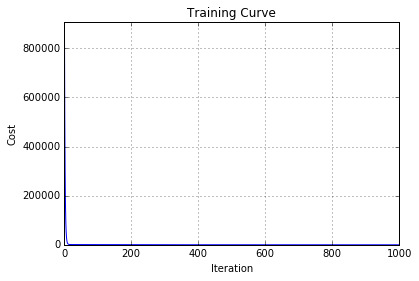

In [73]:
def plot_training_curve(history):
    """Plot the training curve.
    
    Parameters:
    history -- numpy array/list of cost values over all training iterations
    
    Returns:
    Plot of the cost for each iteration of training
    
    """
    plt.plot(range(1, len(history)+1), history)
    plt.grid(True)
    plt.xlim(1, len(history))
    plt.ylim(min(history), max(history))
    
    plt.title("Training Curve")
    plt.xlabel("Iteration")
    plt.ylabel("Cost")

# Test training curve plotting
initial_weights = np.ones((x.shape[1],1))
history, final_weights = gradient_descent(initial_weights, x, y, iterations = 1000, verbose = False)
plot_training_curve(history)
print final_weights